In [2]:
from seagul.rl.ars.ars_pool import ars
import torch
torch.set_default_dtype(torch.double)
import seagul.envs
import matplotlib.pyplot as plt
from seagul.nn import MLP
import gym
import dill as pickle
import numpy as np

torch.set_default_dtype(torch.float64)
env_name = "Humanoid-v2"
env = gym.make(env_name)
in_size = env.observation_space.shape[0]
out_size = env.action_space.shape[0]

W = np.load("./hm_np/Wc")[0,:,:]
m = np.load("./hm_np/MUc")[0,:]
s = np.load("./hm_np/SIGc")[0,:]

/home/sgillen/work/seagul/seagul/envs/__init__.py:55: UserWarning: Warning, pybullet envs not installed
  warnings.warn("Warning, pybullet envs not installed")


running build_ext


In [5]:
import time
done = False

A = []; O = [];
o = env.reset()
R=0
while not done:
    O.append(o)
    
    a = W@((o - m)/s)
    o,r,done,_ = env.step(a)
    env.render()
    time.sleep(.001)
    R+=r
    
    A.append(a)
print(R)

99.98077581559943


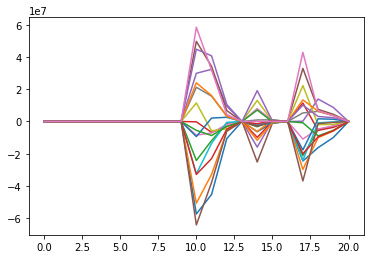

In [6]:
plt.plot(A)